In [1]:
# Data generating distribution and convergence of linear regression

In [9]:
# Experiment with numpy.random.normal
import numpy as np
a = np.random.normal(168, 30, size=2)
print(a)
a.shape

[149.12357326 110.03730174]


(2,)

In [17]:
# Generate one synthetic dataset
number_of_samples = 10
alpha = 20
beta = 0.5
X = np.random.normal(168, 30, size=number_of_samples).reshape(-1,1)
Y = alpha + beta * X + np.random.normal(0, 20, size=number_of_samples).reshape(-1,1)
Y.shape
Y

array([[114.86515818],
       [154.85444668],
       [173.98868108],
       [110.79627741],
       [121.36077989],
       [ 91.25897211],
       [ 93.46414028],
       [105.02717971],
       [ 89.33269864],
       [106.35165489]])

In [19]:
# Function to generate any n-size dataset
def generate_dataset(number_of_samples=10):
    alpha = 20
    beta = 0.5
    X = np.random.normal(168, 30, size=number_of_samples).reshape(-1,1)
    Y = alpha + beta * X + np.random.normal(0, 20, size=number_of_samples).reshape(-1,1)
    return X,Y

In [23]:
# Generate datasets
datasets = {}
sample_sizes = [10,10**3,10**4,10**5,10**6]
for size in sample_sizes:
    datasets[size] = generate_dataset(size)
datasets[1000][0].shape

(1000, 1)

In [30]:
# Define linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model(X,Y):
    sk_model = LinearRegression()
    sk_model.fit(X, Y)
    r2 = sk_model.score(X, Y)
    return sk_model.coef_.item(), sk_model.intercept_.item(), r2

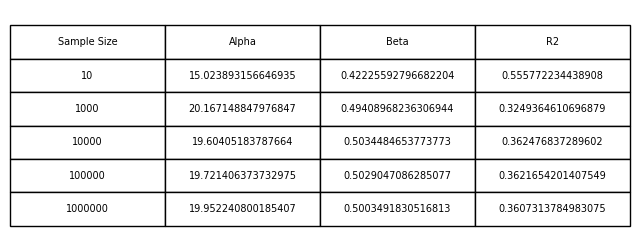

In [32]:
# Run linear regressions
# This is adapted code from HW1
# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "how do i create a table"
import matplotlib.pyplot as plt

sizes = sample_sizes
alphas = []
betas = []
r2s = []
for size, (X, Y) in datasets.items():
    b_calc, a_calc, r2 = model(X,Y)
    alphas.append(a_calc)
    betas.append(b_calc)
    r2s.append(r2)

table_data = list(zip(sizes, alphas, betas, r2s))
fig, ax = plt.subplots(figsize=(8,3))
ax.axis('off')  # hide axes

# Create the table
table = ax.table(cellText=table_data,
                 colLabels=['Sample Size', 'Alpha', 'Beta', 'R2'],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(True)
table.scale(1, 2) 
plt.show()

In [ ]:
# Observations
# The Alpha converges to 20 and the Beta converges to 0.5
# These are the alpha and beta values we chose during the data generating process

# The R2 converges to 0.36, not 0.